<a href="https://colab.research.google.com/github/luanakwon/GroundTemperature/blob/main/GroundTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time


In [2]:
# cols = ["YearMonthDayHourMinute","STN","Lon","Lat","isitu-LST","Band1","Band2","Band3","Band4","Band5","Band6","Band7","Band8","Band9","Band10","Band11","Band12","Band13","Band14","Band15","Band16","30daysBand3","30daysBand13","GK2A-LST","SolarZA","SateZA","ESR","Height","LandType","insitu-TA","insitu-HM","insitu-TD","insitu-TG","insitu-TED0.05","insitu-TED0.1","insitu-TED0.2","insitu-TED0.3","insitu-TED0.5","insitu-TED1.0","insitu-TED1.5","insitu-TED3.0","insitu-TED5.0","insitu-PA","insitu-PS"]
# features = ["YearMonthDayHourMinute","STN","Lon","Lat",
#            "Band1","Band2","Band3","Band4",
#            "Band5","Band6","Band7","Band8",
#            "Band9","Band10","Band11","Band12",
#            "Band13","Band14","Band15","Band16",
#            "30daysBand3","30daysBand13",
#            "GK2A-LST","SolarZA","SateZA",
#            "ESR",
#            "LandType"]
# targets = ["isitu-LST","insitu-TA"]

In [3]:
cols = ["YearMonthDayHourMinute","STN","Lon","Lat","isitu-LST","Band1","Band2","Band3","Band4","Band5","Band6","Band7","Band8","Band9","Band10","Band11","Band12","Band13","Band14","Band15","Band16","30daysBand3","30daysBand13","GK2A-LST","SolarZA","SateZA","ESR","Height","LandType","insitu-TA","insitu-HM","insitu-TD","insitu-TG","insitu-TED0.05","insitu-TED0.1","insitu-TED0.2","insitu-TED0.3","insitu-TED0.5","insitu-TED1.0","insitu-TED1.5","insitu-TED3.0","insitu-TED5.0","insitu-PA","insitu-PS"]
features = ["YearMonthDayHourMinute","STN","Lon","Lat",
           "Band7",
           "Band11","Band12",
           "Band13","Band14","Band15",
           "SolarZA","SateZA",
           "ESR",
           "LandType",
           "insitu-HM","insitu-TD","insitu-TG",]
targets = ["isitu-LST","insitu-TA"]

# Data Overview

In [ ]:
sample = pd.read_csv('20200101.LST.csv',header=0,names=cols)
sample.head()

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,insitu-TED0.1,insitu-TED0.2,insitu-TED0.3,insitu-TED0.5,insitu-TED1.0,insitu-TED1.5,insitu-TED3.0,insitu-TED5.0,insitu-PA,insitu-PS
0,202001010000,92,128.66670,38.06670,-999.0,-0.00057,0.00000,0.0003,-0.00030,0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,202001010000,93,127.75443,37.94738,-999.0,0.00000,0.00000,0.0003,0.00075,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,202001010000,95,127.30420,38.14787,-2.6,-0.00057,-0.00057,0.0003,-0.00060,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1014.1,1034.6
3,202001010000,96,131.86983,37.23952,-999.0,0.00000,0.00000,0.0000,0.00105,0.0000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,202001010000,98,127.06070,37.90188,-3.1,0.00000,0.00000,0.0003,0.00060,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1019.6,1034.8


(104543, 44)
0.0 7.239350000000002
0.0 5.420450000000002


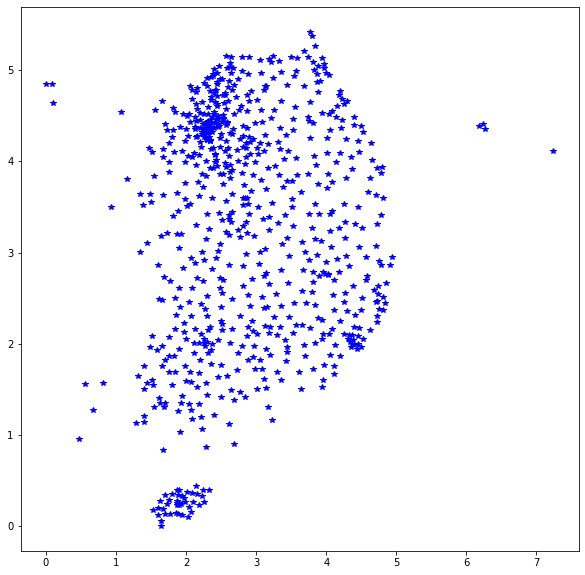

In [ ]:
print(sample.shape)
df = sample.iloc[:,1:4].drop_duplicates().to_numpy()
df[:,1:] -= [124.63048,33.12206]
print(min(df[:,1]),max(df[:,1]))
print(min(df[:,2]),max(df[:,2]))
plt.figure(figsize=(10,10))
plt.plot(df[:,1],df[:,2],'b*')
plt.show()

In [ ]:
for i in range(4,44):
  col = sample.loc[sample.iloc[:,i] > -999].iloc[:,i]
  if i == 28:
    print(f"{cols[i]} \t\tmin: {np.min(col)} \t\t\tmax: {np.max(col)} \t\t\tavg: {np.mean(col)} ")
  elif len(cols[i]) > 6:
    print(f"{cols[i]} \t\tmin: {np.min(col)} \t\tmax: {np.max(col)} \t\tavg: {np.mean(col)} ")
  else:
    print(f"{cols[i]} \t\t\tmin: {np.min(col)} \t\tmax: {np.max(col)} \t\tavg: {np.mean(col)} ")

isitu-LST 		min: -4.9 		max: 26.2 		avg: 0.27080945558739256 
Band1 			min: -0.00113 		max: 0.47359 		avg: 0.05738944055405184 
Band2 			min: -0.00114 		max: 0.48815 		avg: 0.054203694192665935 
Band3 			min: -0.00328 		max: 0.50395 		avg: 0.0484779530327403 
Band4 			min: -0.00254 		max: 0.5813 		avg: 0.059793412735871763 
Band5 			min: -0.00151 		max: 0.08579 		avg: 0.0038715424256143016 
Band6 			min: -0.00129 		max: 0.42633 		avg: 0.05491612221505149 
Band7 			min: 238.19384 		max: 308.08012 		avg: 271.8489144462853 
Band8 			min: 228.0943 		max: 245.40486 		avg: 238.82654382596303 
Band9 			min: 230.42801 		max: 254.45996 		avg: 248.05423254235814 
Band10 			min: 231.328 		max: 262.12081 		avg: 253.84858025438996 
Band11 			min: 233.6343 		max: 285.24053 		avg: 265.11799543090245 
Band12 			min: 229.78848 		max: 262.39371 		avg: 247.0980390755849 
Band13 			min: 234.30622 		max: 287.81421 		avg: 266.98636089782985 
Band14 			min: 233.11319 		max: 288.20345 		avg: 266.9280302948457

In [ ]:
df_LST = sample.loc[(sample['isitu-LST'] > -999)]
print(f"df size from {sample.shape} -> {df_LST.shape}")
df_TA = sample.loc[(sample['insitu-TA'] > -999)]
print(f"df size from {sample.shape} -> {df_TA.shape}")
df_LST_TA = sample.loc[(sample['isitu-LST'] > -999) | (sample['insitu-TA'] > -999)]
print(f"df size from {sample.shape} -> {df_LST_TA.shape}")

df size from (104543, 44) -> (13960, 44)
df size from (104543, 44) -> (13960, 44)
df size from (104543, 44) -> (13960, 44)


# Drop unlabeled data

In [ ]:
%%bash
STARTYEAR=2020
ENDYEAR=2021
for (( c=$STARTYEAR; c<=$ENDYEAR; c++ ))
do
  STARTMONTH=1
  ENDMONTH=12
  for (( d=$STARTMONTH; d<=$ENDMONTH; d++ ))
  do
    wget "https://bd.kma.go.kr/contest/resources/$c$(printf '%02d' $d).zip"
    unzip "/content/$c$(printf '%02d' $d).zip" -d "/content/data"
  done
done

In [ ]:
folderpath='data/'

for year in [2020]:
  for month in range(3,4):
    allmon = []
    for i in range(1,32):
      try:
        df = pd.read_csv(folderpath + '%d%02d%02d.LST.csv'%(year,month,i),names=cols)
      except FileNotFoundError:
        print('%d%02d%02d.LST.csv missing'%(year,month,i))
        continue
      # exclude testset
      if year==2021 and ((month==7 and 1<=i and i<=11) or (month==8 and 21<=i and i<=31)):
        continue

      len0 = df.shape[0]
      df = df.loc[(df['isitu-LST'] > -999) | (df['insitu-TA'] > -999)]
      len1 = df.shape[0]
      print(f"dropped {len0-len1}, concatenating {len1} from",'%d%02d%02d.LST.csv'%(year,month,i))
      allmon.append(df)
      
    if len(allmon) != 0:
      df_all = pd.concat(allmon)
      print('='*10 + ' %d%02d done '%(year,month) + '='*10 + f'  {df_all.shape}')
      df_all.to_csv('%d%02d.LST.csv'%(year,month),header=False, index=False)

# Gather test data

In [ ]:
%%bash
YEAR=2021
STARTMONTH=7
ENDMONTH=8
for (( d=$STARTMONTH; d<=$ENDMONTH; d++ ))
do
  wget "https://bd.kma.go.kr/contest/resources/$YEAR$(printf '%02d' $d).zip"
  unzip "/content/$YEAR$(printf '%02d' $d).zip" -d "/content/data"
done

In [ ]:
df = pd.read_csv('data/202107/20210701.LST.csv')
df.dtypes

In [ ]:
testsetcols = cols[:]
testsetcols.remove('isitu-LST')
testsetcols.remove('insitu-TA')
print(len(testsetcols))
testdays = {7:(1,11), 8:(21,31)}
folderpath = '/content/data/'
dfList = []
for month in [7, 8]:
  day0, day1 = testdays[month]
  for day in range(day0,day1+1):
    df = pd.read_csv(folderpath+'2021%02d/2021%02d%02d.LST.csv'%(month,month,day), usecols=testsetcols)
    dfList.append(df)
    print(f'appended {df.shape[0]}rows from '+'2021%02d/2021%02d%02d.LST.csv'%(month,month,day))
df_all = pd.concat(dfList)
print(f'{df_all.shape[0]} rows concatenated')

df_all.to_csv('test.LST.csv', index=False)
print('test.LST.csv saved')

In [ ]:
print(df_all.shape)

(54503, 27)


# Training

## prepare train data

In [4]:
!gdown 1-EMhXFZJhzG7km6m75MoM3lsAVDpKji3 -O train10M.csv

Downloading...
From: https://drive.google.com/uc?id=1-EMhXFZJhzG7km6m75MoM3lsAVDpKji3
To: /content/train10M.csv
100% 3.51G/3.51G [00:17<00:00, 204MB/s]


In [5]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error # idk but xgb cannot recognize this

from sklearn.model_selection import validation_curve

import joblib



In [6]:
RANDOM_STATE = 31415
target = targets[:1] # isitu-LST
timecol = features[:1] # time column
# featureInUse = features[1:] # excluding time column
# featureInUse = features[1:] + cols[cols.index('insitu-TA')+1:]
featureInUse = features[1:]
# sample fraction of train data
fraction = 0.5 # 0.0 ~ 1.0
fraction_s = 0.7 # fraction of summer train data

In [7]:
df = pd.read_csv(
    f'/content/train10M.csv',
    usecols=timecol+featureInUse+targets,
    #na_values=-999
)
print(df.shape)

(10583013, 19)


In [8]:
# df = df.dropna()
# print(df.shape)

In [9]:
YMDH = pd.to_datetime(df[timecol[0]],format='%Y%m%d%H%M')
df.insert(0,'Hour',YMDH.dt.hour)
df.insert(0,'Day',YMDH.dt.day)
df.insert(0,'Month',YMDH.dt.month)
df.insert(0,'Year',YMDH.dt.year)
df.drop(columns=timecol[0], inplace=True)
YMDH = ['Year','Month','Day','Hour']


In [10]:
df_other = df[~df['Month'].isin([7,8])]
df_summer = df[df['Month'].isin([7,8])]

In [11]:
df_other.drop(columns=YMDH, inplace=True)
df_summer.drop(columns=YMDH, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
X_train, X_val, Y_train_all, Y_val_all = train_test_split(
    df_other.loc[:,featureInUse],df_other.loc[:,targets], test_size=0.2*fraction, train_size=0.8*fraction, 
    random_state=RANDOM_STATE, shuffle=True, stratify=None)

sX_tr, sX_v, sY_tr, sY_v = train_test_split(
    df_summer.loc[:,featureInUse],df_summer.loc[:,targets], test_size=0.2*fraction_s, train_size=0.8*fraction_s, 
    random_state=RANDOM_STATE, shuffle=True, stratify=None)
print(X_train.shape)
print(f"{sX_tr.shape[0]} train values, {sX_v.shape[0]} test values out of {df_summer.shape[0]} summer values")
print(f"{X_train.shape[0]} train values, {X_val.shape[0]} test values out of {df_other.shape[0]} values of other seasons")
X_train = pd.concat([X_train,sX_tr])
X_val = pd.concat([X_val,sX_v])
Y_train_all = pd.concat([Y_train_all,sY_tr])
Y_val_all = pd.concat([Y_val_all,sY_v])
print(X_train.shape)
print(X_val.shape)
print(Y_train_all.shape)
print(Y_val_all.shape)

(3614080, 16)
866774 train values, 216694 test values out of 1547811 summer values
3614080 train values, 903521 test values out of 9035202 values of other seasons
(4480854, 16)
(1120215, 16)
(4480854, 2)
(1120215, 2)


In [13]:
# split labels into LST & TA
Y_train_LST = Y_train_all.loc[:,targets[:1]]
Y_train_TA = Y_train_all.loc[:,targets[1:]]
Y_val_LST = Y_val_all.loc[:,targets[:1]]
Y_val_TA = Y_val_all.loc[:,targets[1:]]

# check shapes
for df_subset in [X_train, X_val, Y_train_LST, Y_train_TA, Y_val_LST, Y_val_TA]:
  print(df_subset.shape)

(4480854, 16)
(1120215, 16)
(4480854, 1)
(4480854, 1)
(1120215, 1)
(1120215, 1)


In [14]:
X_train.head()

,STN,Lon,Lat,Band7,Band11,Band12,Band13,Band14,Band15,SolarZA,SateZA,ESR,LandType,insitu-HM,insitu-TD,insitu-TG
10323972,974,128.15605,35.24435,273.54420,272.35346,252.74907,273.68338,273.80042,272.87511,118.56457,41.10588,-3.27304,2,48.3,-5.8,-999.0
2442517,271,128.91449,36.94361,286.29251,277.60973,254.92374,279.77981,279.73701,278.08617,60.11181,43.05540,4.83376,2,44.5,-4.4,14.0
609602,138,129.38002,36.03201,260.20609,256.36274,242.55981,257.12883,255.68889,254.41468,165.48199,42.02608,-9.41262,0,58.3,-4.5,2.0
1424250,226,127.73415,36.48761,259.15791,237.83856,233.11485,237.68148,236.57109,235.38895,38.63396,42.51866,6.20446,2,80.9,17.1,31.3
2741012,295,127.92641,34.81662,287.37890,284.84252,262.43019,287.07982,287.26630,285.36993,131.25893,40.63226,-6.43351,2,95.3,15.7,14.3


(4480854, 16)


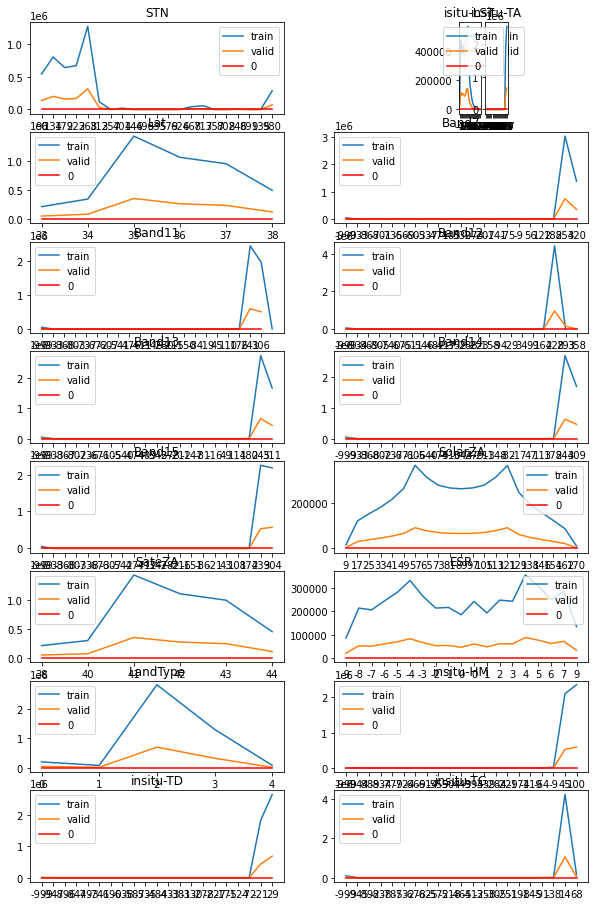

In [15]:
x_tr_cols = list(X_train.columns)
plt.figure(figsize=(10,2*(len(x_tr_cols)+2)))
print(X_train.shape)

for i, colname in enumerate(x_tr_cols):
  plt.subplot(len(x_tr_cols)+2,2,i+1)
  plt.title(colname)
  for sdf,lbl in zip([X_train, X_val],['train','valid']):
    values = sdf[colname].values.ravel()
    diff = np.max(values)-np.min(values)
    stepsize = (diff)/20 if diff > 20 else diff/int(diff)
    x = np.arange(np.min(values),np.max(values)+stepsize,stepsize)
    y = [np.sum((values>=(p-stepsize/2))*(values<(p+stepsize/2))) for p in x]
    x = x.astype(np.int64)
    plt.plot(y, label=lbl)
  plt.plot(np.zeros(len(y)),'r-',label='0')
  plt.xticks(np.arange(len(x)),x)
  plt.legend()
# isitu-LST, insitu-TA
for i, dflist in enumerate([[Y_train_LST,Y_val_LST],[Y_train_TA,Y_val_TA]]):
  plt.subplot(len(x_tr_cols)+2,2,len(x_tr_cols)+i+1)
  plt.title(dflist[0].columns[0])
  for sdf, lbl in zip(dflist,['train','valid']):
    values = sdf.values.ravel()
    diff = np.max(values)-np.min(values)
    stepsize = (diff)/20 if diff > 20 else diff/int(diff)
    x = np.arange(np.min(values),np.max(values)+stepsize,stepsize)
    y = [np.sum((values>=(p-stepsize/2))*(values<(p+stepsize/2))) for p in x]
    x = x.astype(np.int64)
    plt.plot(y,label=lbl)
  plt.plot(np.zeros(len(y)),'r-',label='0')
  plt.xticks(np.arange(len(x)),x)
  plt.legend()

plt.savefig('featureDistribution11by2.png')

**WARNING! training all 3 models at the same time will require LARGE amount of memory**

#Useless attempts

## Random Forest Regressor

In [ ]:
RFR_model = RandomForestRegressor(
    n_estimators=200,
    criterion='squared_error', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=0.8, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None, 
    random_state=RANDOM_STATE, 
    verbose=1, 
    warm_start=False, 
    ccp_alpha=0.0, 
    max_samples=None
)

In [ ]:
t0 = time.time()
train_scores, valid_scores = validation_curve( RFR_model, 
    X_train, Y_train_LST.values.ravel(), scoring=make_scorer(mean_squared_error), 
    param_name='n_estimators',
    param_range=[10,50,100,150,200], cv=2)
print(f'total time elapsed : {time.time()-t0}s')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

total time elapsed : 12865.805200099945s


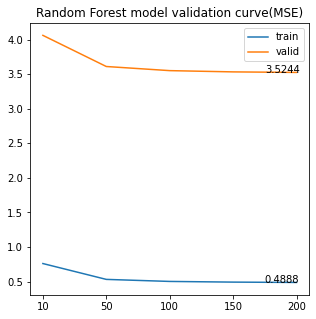

In [ ]:
mse_tr = np.mean(train_scores[-1,:])
mse_val = np.mean(valid_scores[-1,:])

plt.figure(figsize=(5,5))
plt.title(f'Random Forest model validation curve(MSE)')
plt.plot(np.mean(train_scores,axis=1), label='train')
plt.plot(np.mean(valid_scores,axis=1), label='valid')
plt.xticks([0,1,2,3,4],labels=[10,50,100,150,200])
plt.annotate('%.4f'%(mse_tr),(3.5,mse_tr))
plt.annotate('%.4f'%(mse_val),(3.5,mse_val))
plt.legend()
plt.show()


In [ ]:
# save model
joblib.dump(RFR_model, f'RFR_{fraction}') 

['RFR_202001']

## Gradient Boosting Regressor

In [ ]:
GBR_model = GradientBoostingRegressor(
    loss='squared_error', 
    learning_rate=0.1, 
    n_estimators=200, 
    subsample=1.0, 
    criterion='friedman_mse', 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_depth=3, 
    min_impurity_decrease=0.0, 
    init=None, 
    random_state=RANDOM_STATE, 
    max_features=None, 
    alpha=0.9, # only for huber loss or quantile loss
    verbose=1, 
    max_leaf_nodes=None, 
    warm_start=False, # resume from previous fit
    validation_fraction=0.1, 
    n_iter_no_change=30, # n of iters with no improvement
    tol=0.0001, 
    ccp_alpha=0.0
)

In [ ]:
GBR_model.fit(X_train,Y_train.values.ravel())

      Iter       Train Loss   Remaining Time 
         1         115.6347            2.16m
         2          99.8568            1.94m
         3          86.8791            1.87m
         4          76.3430            1.82m
         5          67.6314            1.80m
         6          60.5036            1.78m
         7          54.4496            1.77m
         8          49.4818            1.75m
         9          45.4581            1.74m
        10          42.0050            1.73m
        20          27.4036            1.63m
        30          23.1016            1.52m
        40          20.8544            1.42m
        50          19.3543            1.33m
        60          18.4296            1.23m
        70          17.7658            1.14m
        80          17.2512            1.06m
        90          16.8288           57.95s
       100          16.4358           52.60s
       200          14.3885            0.00s


GradientBoostingRegressor(n_estimators=200, n_iter_no_change=30,
                          random_state=31415, verbose=1)

In [ ]:
prediction = GBR_model.predict(X_val)
diff = prediction - Y_val.values.ravel()
loss = np.sqrt(np.mean(diff**2))
print(f'RMSE loss {loss}')

RMSE loss 3.9008046385672372


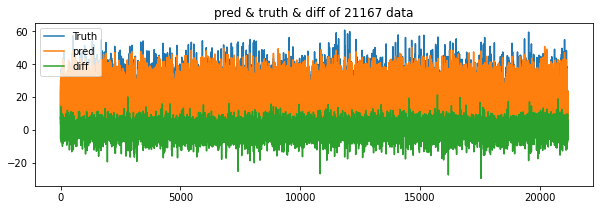

In [ ]:
plt.figure(figsize=(10,3))
plt.title(f'pred & truth & diff of {X_val.shape[0]} data')
plt.plot(Y_val.values.ravel(), label='Truth')
plt.plot(prediction,label='pred')
plt.plot(diff,label='diff')
plt.legend()
plt.show()

In [ ]:
# save model
joblib.dump(GBR_model, f'GBR_{fraction}') 

## Adaboost Regressor

In [ ]:
AR_model = AdaBoostRegressor(
    base_estimator=None,
    n_estimators=50, 
    learning_rate=1.0, 
    loss='square', 
    random_state=RANDOM_STATE
)

In [ ]:
t0 = time.time()
xt, xv, yt, yv = train_test_split(X_train, Y_train_LST, test_size=0.5)
yt = yt.values.ravel()
yv = yv.values.ravel()
train_scores = []
valid_scores = []
for n_es in [2,6,10,14,18,22]:
    AR = AdaBoostRegressor(
        base_estimator=None,
        n_estimators=n_es, 
        learning_rate=1.0, 
        loss='square', 
        random_state=RANDOM_STATE
    )
    AR.fit(xt,yt)
    pred = AR.predict(xt)
    mse = np.mean((yt-pred)**2)
    train_scores.append(mse)
    pred = AR.predict(xv)
    mse = np.mean((yv-pred)**2)
    valid_scores.append(mse)
    print(f'{n_es} epoch done, ({train_scores[-1]}, {valid_scores[-1]}) ')

print(f'time per epoch {(time.time()-t0)/72}s')


2 epoch done, (17.599483138227054, 17.775887490468662) 
6 epoch done, (13.647272846051107, 13.777017781100183) 
10 epoch done, (14.856360401801677, 14.937327958311627) 
14 epoch done, (14.761461425137608, 14.854960706801593) 
18 epoch done, (15.909611070938677, 15.981230808266483) 
22 epoch done, (15.788157840421915, 15.872632695491628) 
time per epoch 4.5727007819546595s


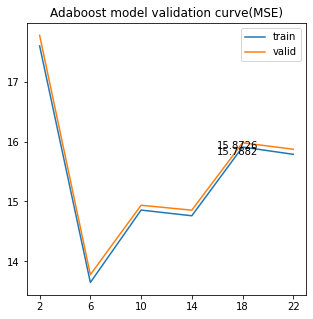

In [ ]:
mse_tr = train_scores[-1]
mse_val = valid_scores[-1]

plt.figure(figsize=(5,5))
plt.title(f'Adaboost model validation curve(MSE)')
plt.plot(train_scores, label='train')
plt.plot(valid_scores, label='valid')
plt.xticks([0,1,2,3,4,5],labels=[2,6,10,14,18,22])
plt.annotate('%.4f'%(mse_tr),(3.5,mse_tr))
plt.annotate('%.4f'%(mse_val),(3.5,mse_val))
plt.legend()
plt.show()

In [ ]:
# save model
joblib.dump(GBR_model, f'AR_{fraction}') 

## XGBoost

In [ ]:
import xgboost as xgb

### isitu-LST learning

In [ ]:
XGBR_model = xgb.XGBRegressor(
    max_depth=3, 
    learning_rate=0.1, 
    n_estimators=1700, 
    verbosity=0, 
    silent=None, 
    objective="reg:squarederror", 
    booster='gbtree', 
    n_jobs=1, 
    nthread=None, 
    gamma=0, 
    min_child_weight=1, 
    max_delta_step=0, 
    subsample=0.8, 
    colsample_bytree=1, 
    colsample_bylevel=1, 
    colsample_bynode=1, 
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    base_score=0.5, 
    random_state=RANDOM_STATE, 
    missing=None, 
    importance_type="gain",
    early_stopping_rounds=30,
    predictor='cpu_predictor'
)

In [ ]:
XGBR_model.fit(X_train,Y_train,eval_set=[(X_train,Y_train),(X_val,Y_val)])

RMSE = 3.250522


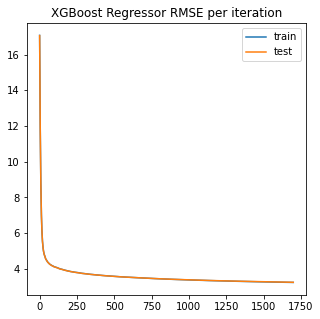

In [ ]:
results = XGBR_model.evals_result()
print(f"RMSE = {results['validation_1']['rmse'][-1]}")
plt.figure(figsize=(5,5))
plt.title('XGBoost Regressor RMSE per iteration')
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='val')
plt.legend()
plt.show()

RMSE = 3.250522


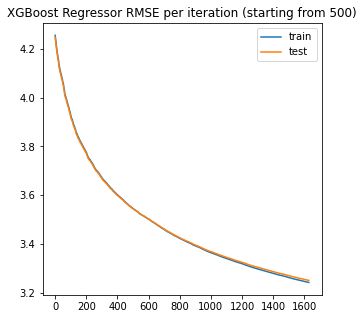

In [ ]:
print(f"RMSE = {results['validation_1']['rmse'][-1]}")
plt.figure(figsize=(5,5))
plt.title('XGBoost Regressor RMSE per iteration (starting from 70)')
plt.plot(results['validation_0']['rmse'][70:], label='train')
plt.plot(results['validation_1']['rmse'][70:], label='val')
plt.legend()
plt.show()

In [ ]:
prediction = XGBR_model.predict(X_val)
diff = prediction - Y_val.values.ravel()
loss = np.sqrt(np.mean(diff**2))
print(f'RMSE loss {loss}')

RMSE loss 3.251054522610311


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


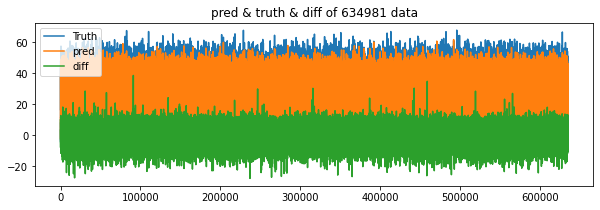

In [ ]:
plt.figure(figsize=(10,3))
plt.title(f'pred & truth & diff of {X_val.shape[0]} data')
plt.plot(Y_val.values.ravel(), label='Truth')
plt.plot(prediction,label='pred')
plt.plot(diff,label='diff')
plt.legend()
plt.show()

### insitu-TA learning

In [ ]:
XGBR_model = xgb.XGBRegressor(
    max_depth=3, 
    learning_rate=0.1, 
    n_estimators=1000, 
    verbosity=0, 
    silent=None, 
    objective="reg:squarederror", 
    booster='gbtree', 
    subsample=0.8, 
    random_state=RANDOM_STATE, 
    early_stopping_rounds=30,
    predictor='cpu_predictor'
)

In [ ]:
XGBR_model.fit(X_train,Y_train_TA,eval_set=[(X_train,Y_train_TA),(X_val,Y_val_TA)])

RMSE = 20.981844


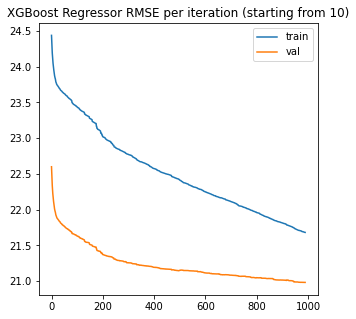

In [ ]:
results = XGBR_model.evals_result()
cut_front = 10
print(f"RMSE = {results['validation_1']['rmse'][-1]}")
plt.figure(figsize=(5,5))
plt.title(f'XGBoost Regressor RMSE per iteration (starting from {cut_front})')
plt.plot(results['validation_0']['rmse'][cut_front:], label='train')
plt.plot(results['validation_1']['rmse'][cut_front:], label='val')
plt.legend()
plt.show()

In [ ]:
prediction = XGBR_model.predict(X_val)
diff = prediction - Y_val_TA.values.ravel()
loss = np.sqrt(np.mean(diff**2))
print(f'RMSE loss {loss}')

RMSE loss 20.9875680563548


## attempt 1

In [ ]:
# plot train score and validation score at each given n_estimators
# score = rmse
train_loss = []
test_loss = []
for n_estimators in [100,500,1000,2000]:
  XGBR_model.n_estimators = n_estimators
  XGBR_model.fit(X_train,Y_train)
  # get train loss
  predt = XGBR_model.predict(X_train)
  diff = predt - Y_train.values.ravel()
  train_loss.append(np.sqrt(np.mean(diff**2)))
  print(f'\rn_estimators {n_estimators} train loss {train_loss[-1]}', end='\t')
  # get test loss
  predt = XGBR_model.predict(X_val)
  diff = predt - Y_val.values.ravel()
  test_loss.append(np.sqrt(np.mean(diff**2)))
  print(f'test loss {test_loss[-1]}',end='\t\t\t')


plt.figure(figsize=(5,5))
plt.title('loss per n_estimators in XGBR')
plt.plot(train_loss,label='train rmse')
plt.plot(test_loss,label='test rmse')
plt.legend()
plt.show()

In [ ]:
XGBR_model.save_model('XGBR0627.txt')

In [ ]:
mm = xgb.XGBRegressor()
mm.load_model('XGBR0627.txt')
pred2 = mm.predict(X_val)
print(np.sum(pred2-prediction))

0.0


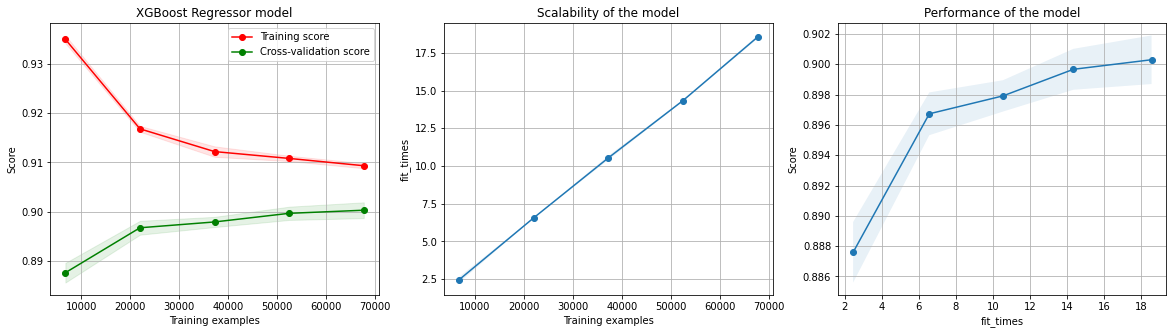

In [ ]:
import LearningCurvePlotter
from LearningCurvePlotter import plot_learning_curve

plt = plot_learning_curve(
    XGBR_model,
    'XGBoost Regressor model',
    X_train,
    Y_train,
    cv=3
)
plt.show()

#Useful attempt

## attempt 2 (python xgboost (not sklearn api))

In [16]:
# import xgb
import xgboost as xgb

### Predicting LST

In [17]:
# setting params for LST prediction
# https://xgboost.readthedocs.io/en/stable/parameter.html
param_LST = {
    'max_depth': 3, 
    'eta': 0.5, 
    'subsample': 0.5, 
    'predictor':'gpu_predictor', 
    'objective': 'reg:squarederror',
    'tree_method': 'gpu_hist',
    'eval_metric': 'rmse',
    'seed':RANDOM_STATE 
} 
dtrain_LST = xgb.DMatrix(X_train,label=Y_train_LST)
dval_LST = xgb.DMatrix(X_val,label=Y_val_LST)
evallist_LST = [(dtrain_LST,'train'),(dval_LST,'eval')]

In [18]:
t0 = time.time()
# evals result
evals_LST = {}
# train LST
model_LST = xgb.train(
    param_LST,
    dtrain_LST,
    num_boost_round=10000,
    evals=evallist_LST,
    early_stopping_rounds=20,
    verbose_eval=40,
    evals_result = evals_LST
)
print(f'time {(time.time()-t0)}')

[0]	train-rmse:10.3497	eval-rmse:10.3544
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[40]	train-rmse:2.56516	eval-rmse:2.56584
[80]	train-rmse:2.39827	eval-rmse:2.39919
[120]	train-rmse:2.31529	eval-rmse:2.31677
[160]	train-rmse:2.26301	eval-rmse:2.2662
[200]	train-rmse:2.22599	eval-rmse:2.23022
[240]	train-rmse:2.19873	eval-rmse:2.20366
[280]	train-rmse:2.17733	eval-rmse:2.18344
[320]	train-rmse:2.16194	eval-rmse:2.16837
[360]	train-rmse:2.14567	eval-rmse:2.15201
[400]	train-rmse:2.13163	eval-rmse:2.13822
[440]	train-rmse:2.12223	eval-rmse:2.12919
[480]	train-rmse:2.11217	eval-rmse:2.1197
[520]	train-rmse:2.10348	eval-rmse:2.11156
[560]	train-rmse:2.09455	eval-rmse:2.103
[600]	train-rmse:2.08595	eval-rmse:2.0948
[640]	train-rmse:2.07907	eval-rmse:2.08833
[680]	train-rmse:2.07277	eval-rmse:2.08229
[720]	train-rmse:2.06684	eval-rmse:2.0767
[760]	train-rmse:2.06105	eval-rmse:2.07106
[800]	t

eval-RMSE = 1.898142


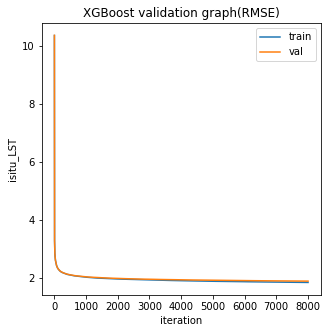

In [19]:
results = evals_LST
print(f"eval-RMSE = {results['eval']['rmse'][-1]}")

plt.figure(figsize=(5,5))
plt.title('XGBoost validation graph(RMSE)')
plt.ylabel('isitu_LST')
plt.xlabel('iteration')
plt.plot(results['train']['rmse'], label='train')
plt.plot(results['eval']['rmse'], label='val')
plt.legend()
plt.show()

In [20]:
model_LST.save_model('XGB_LST_0802_10k')

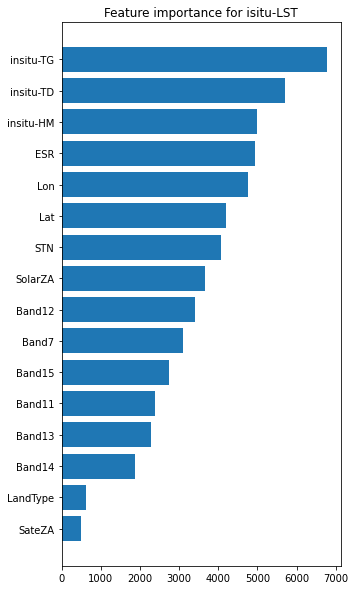

In [21]:
df_fs = pd.DataFrame.from_dict(model_LST.get_fscore(),orient='index')
df_fs = df_fs.sort_values(0,ascending=True)

y = np.arange(len(df_fs))
labels = df_fs.index
values = df_fs.iloc[:,0]

plt.figure(figsize=(5,10))
plt.title('Feature importance for isitu-LST')
plt.barh(y, values)
plt.yticks(y, labels)
plt.show()

### Predicting TA

In [22]:
# setting params for LST prediction
# https://xgboost.readthedocs.io/en/stable/parameter.html
param_TA = {
    'max_depth': 3, 
    'eta': 0.5, 
    'subsample': 0.5, 
    'predictor':'gpu_predictor', 
    'objective': 'reg:squarederror',
    'tree_method': 'gpu_hist',
    'eval_metric': 'rmse',
    'seed':RANDOM_STATE 
} 

dtrain_TA = xgb.DMatrix(X_train,label=Y_train_TA)
dval_TA = xgb.DMatrix(X_val,label=Y_val_TA)
evallist_TA = [(dtrain_TA,'train'),(dval_TA,'eval')]

In [23]:
# evals result
evals_TA = {}
# train TA
model_TA = xgb.train(
    param_TA,
    dtrain_TA,
    num_boost_round=10000,
    evals=evallist_TA,
    early_stopping_rounds=15,
    verbose_eval=20,
    evals_result = evals_TA
)

[0]	train-rmse:17.6144	eval-rmse:18.0808
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 15 rounds.
[20]	train-rmse:8.79867	eval-rmse:9.62629
[40]	train-rmse:8.02678	eval-rmse:8.79962
[60]	train-rmse:7.56161	eval-rmse:8.36857
[80]	train-rmse:7.18992	eval-rmse:8.09343
[100]	train-rmse:6.94557	eval-rmse:7.95021
[120]	train-rmse:6.67407	eval-rmse:7.8171
[140]	train-rmse:6.50267	eval-rmse:7.66079
[160]	train-rmse:6.33613	eval-rmse:7.6601
Stopping. Best iteration:
[149]	train-rmse:6.43491	eval-rmse:7.62911



eval-RMSE = 7.664558


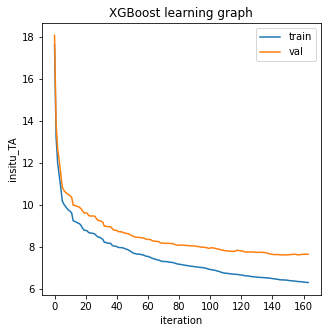

In [24]:
results = evals_TA
print(f"eval-RMSE = {results['eval']['rmse'][-1]}")

plt.figure(figsize=(5,5))
plt.title('XGBoost learning graph')
plt.ylabel('insitu_TA')
plt.xlabel('iteration')
plt.plot(results['train']['rmse'], label='train')
plt.plot(results['eval']['rmse'], label='val')
plt.legend()
plt.show()

In [25]:
model_TA.save_model('XGB_TA_0802_10k')

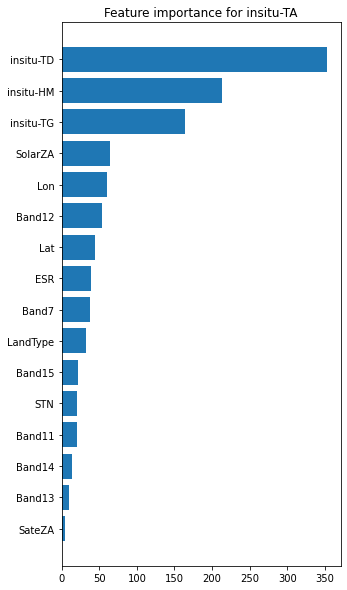

In [26]:
df_fs = pd.DataFrame.from_dict(model_TA.get_fscore(),orient='index')
df_fs = df_fs.sort_values(0,ascending=True)

y = np.arange(len(df_fs))
labels = df_fs.index
values = df_fs.iloc[:,0]

plt.figure(figsize=(5,10))
plt.title('Feature importance for insitu-TA')
plt.barh(y, values)
plt.yticks(y, labels)
plt.show()

# submission

In [27]:
!gdown 1xgucvJDFvw1MTY1xPg3K00mBKPJbjGlF -O TestFeatures.csv

Downloading...
From: https://drive.google.com/uc?id=1xgucvJDFvw1MTY1xPg3K00mBKPJbjGlF
To: /content/TestFeatures.csv
100% 17.7M/17.7M [00:00<00:00, 54.2MB/s]


In [28]:
!wget https://bd.kma.go.kr/contest/resources/1-2_%EA%B2%80%EC%A6%9D%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.csv 
!mv 1-2_*.csv submissionFormat.csv

--2022-08-02 08:58:59--  https://bd.kma.go.kr/contest/resources/1-2_%EA%B2%80%EC%A6%9D%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.csv
Resolving bd.kma.go.kr (bd.kma.go.kr)... 203.247.90.20
Connecting to bd.kma.go.kr (bd.kma.go.kr)|203.247.90.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1141971 (1.1M) [text/csv]
Saving to: ‘1-2_검증데이터셋.csv’

1-2_검증데이터셋.cs 100%[===================>]   1.09M   571KB/s    in 2.0s    

2022-08-02 08:59:02 (571 KB/s) - ‘1-2_검증데이터셋.csv’ saved [1141971/1141971]



In [29]:
submissionFormat = pd.read_csv('submissionFormat.csv',usecols=["YearMonthDayHourMinute","STN"])
submissionFormat.shape

(54503, 2)

In [30]:
X_test = pd.read_csv(
    'TestFeatures.csv',usecols=timecol+featureInUse,
    na_values=-999
)
X_test_unique = X_test.loc[:,["YearMonthDayHourMinute","STN"]]
# Split YMDH to 4 different columns
YMDH = pd.to_datetime(X_test["YearMonthDayHourMinute"],format='%Y%m%d%H%M')
X_test.insert(0,'Hour',YMDH.dt.hour)
X_test.insert(0,'Day',YMDH.dt.day)
X_test.insert(0,'Month',YMDH.dt.month)
X_test.insert(0,'Year',YMDH.dt.year)
X_test.drop(columns=timecol[0], inplace=True)
print(X_test.shape)
# To DMatrix
dX_test = xgb.DMatrix(X_test.loc[:,featureInUse])

(54503, 20)


In [31]:
# X_test.dropna()
# X_test.shape

In [33]:
mm = xgb.Booster(params=param_LST, model_file='XGB_LST_0802_10k')
pred = mm.predict(dX_test)
X_test_unique['isitu-LST'] = pred.reshape((-1,1))
print(X_test_unique.shape)

(54503, 3)


In [ ]:
# mm = xgb.XGBRegressor()
# mm.load_model('XGBR0627.txt')
# pred = mm.predict(X_test)
# X_test_unique['isitu-LST'] = pred.reshape(-1,1)
# print(X_test_unique.shape)

In [34]:
mm2 = xgb.Booster(params=param_TA, model_file='XGB_TA_0802_10k')
pred = mm2.predict(dX_test)
X_test_unique['insitu-TA'] = pred.reshape((-1,1))
print(X_test_unique.shape)

(54503, 4)


In [ ]:
# mm2 = XGBR_model
# pred = mm2.predict(X_test)
# X_test_unique['insitu_TA'] = pred.reshape((-1,1))
# print(X_test_unique.shape)

(54503, 4)


In [35]:
submissionFormat = submissionFormat.merge(X_test_unique,on=["YearMonthDayHourMinute","STN"])
submissionFormat

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,21.085371,21.280521
1,202107010030,93,21.576143,20.765713
2,202107010030,95,20.712753,19.096287
3,202107010030,98,20.798792,20.126266
4,202107010030,99,21.368254,20.532341
...,...,...,...,...
54498,202108312330,973,25.652075,23.990891
54499,202108312330,974,23.948992,24.328583
54500,202108312330,977,22.721256,21.315060
54501,202108312330,978,19.581831,17.600899


In [36]:
# save submission
import datetime
UTC = datetime.datetime.now()
UTC2KST = datetime. timedelta(hours=9)
KST = UTC + UTC2KST

# submission file name should be "접수번호6자리.csv"
submissionFormat.to_csv(
    'submission%02d%02d.csv'%(KST.month,KST.day),
    index=False
)

#Compare

In [37]:
newdf = pd.read_csv('submission0802.csv')
newdf.head()

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,21.085371,21.280521
1,202107010030,93,21.576143,20.765713
2,202107010030,95,20.712753,19.096287
3,202107010030,98,20.798792,20.126266
4,202107010030,99,21.368254,20.532341


In [38]:
olddf = pd.read_csv('220059_0731.csv')
olddf.head()

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,21.314692,20.311895
1,202107010030,93,21.568922,20.390223
2,202107010030,95,19.921833,19.268406
3,202107010030,98,20.684050,19.590193
4,202107010030,99,21.180320,20.047190


In [ ]:
print(olddf['YearMonthDayHourMinute'].unique())

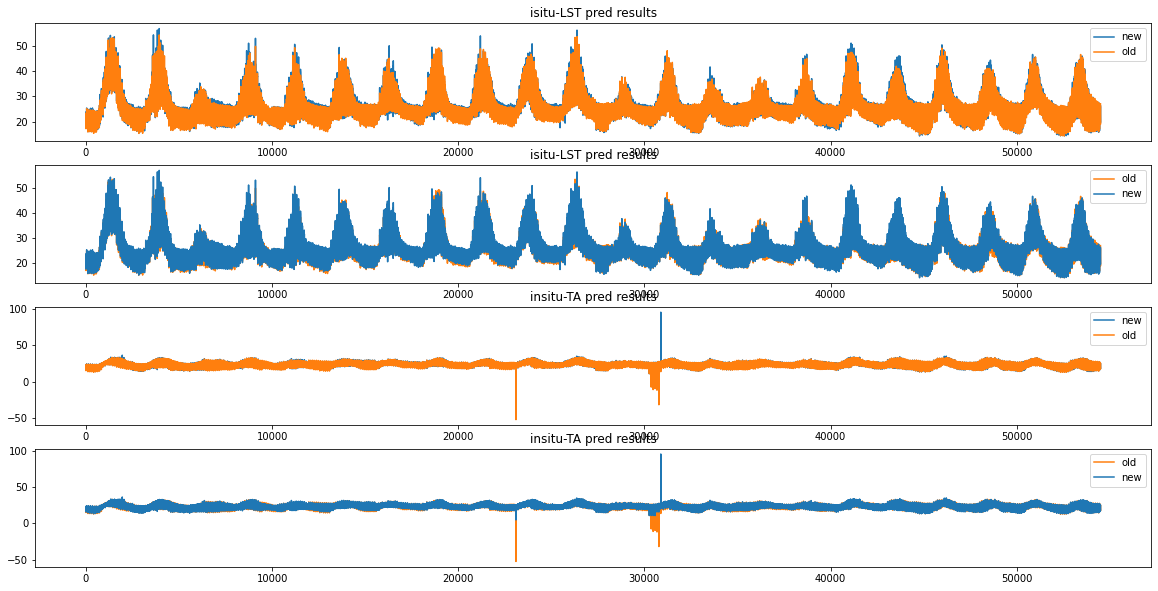

In [39]:

plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
plt.title('isitu-LST pred results')
plt.plot(newdf['isitu-LST'],label='new')
plt.plot(olddf['isitu-LST'],label='old')
plt.legend()

plt.subplot(4,1,2)
plt.title('isitu-LST pred results')
plt.plot()
plt.plot(olddf['isitu-LST'],color='tab:orange',label='old')
plt.plot(newdf['isitu-LST'],color='tab:blue',label='new')
plt.legend()

plt.subplot(4,1,3)
plt.title('insitu-TA pred results')
plt.plot(newdf['insitu-TA'],label='new')
plt.plot(olddf['insitu-TA'],label='old')
plt.legend()

plt.subplot(4,1,4)
plt.title('insitu-TA pred results')
plt.plot(olddf['insitu-TA'],color='tab:orange',label='old')
plt.plot(newdf['insitu-TA'],color='tab:blue',label='new')
plt.legend()

plt.show()


diff rmse 0.6761785584355108
(54503, 2)


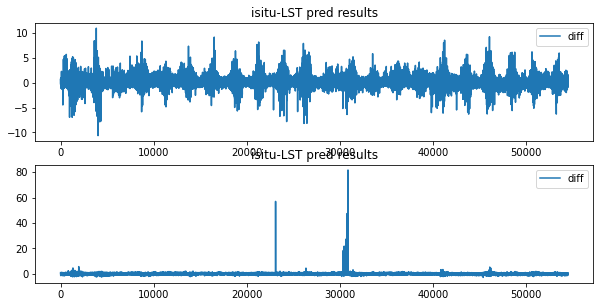

In [42]:
newnp = newdf[['isitu-LST','insitu-TA']].values
oldnp = olddf[['isitu-LST','insitu-TA']].values
diff = newnp-oldnp
print(f'diff rmse {np.sqrt(np.mean(diff[:,1]**2))}')

print(diff.shape)
plt.figure(figsize=(10,10))
plt.subplot(4,1,1)
plt.title('isitu-LST pred results')
plt.plot(diff[:,0],label='diff')
plt.legend()

plt.subplot(4,1,2)
plt.title('isitu-LST pred results')
plt.plot()
plt.plot(diff[:,1],label='diff')
plt.legend()

plt.show()